# Problem Set 2

## Problem 1: Diabetes (3 points)

Load the scikit-learn [diabetes data set](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) using `sklearn.datasets.load_diabetes` (see code below). This data set describes diabetes progression for $n=442$ patients. The relevant columns we will study here are as follows.

| Variable | Symbol | Description                            | Units |
| -------- | ------ | -------------------------------------- | ----- |
| `age`    | $x_1$  | age                                    | Years |
| `sex`    | $x_2$  | sex of the patient (encoded as 1 or 2) | -     |
| `bmi`    | $x_3$  | body mass index                        | kg/m² |
| `bp`     | $x_4$  | blood pressure                         | mmHg  |
| `target` | $y$    | measure of diabetes progression        | -     |

In this exercise, we build a simple, multi-dimensional linear regression model, i.e.,
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \epsilon \, ,$$
where $\epsilon$ is homoscedastic noise.

(a) What are the best-fit coefficients, $\mathbf{\hat \beta} = (\hat \beta_0, \hat \beta_1, \hat \beta_2, \hat \beta_3, \hat \beta_4)$, assuming homoscedasticity?

(b) Make a scatter plot of the predicted vs. the observed $y$ values. What is the mean squared error (MSE), $\mathrm{MSE} = \frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat y_i)^2$, where $\hat y_i$ is the best-fit prediction for patient $i$?

(c) Assuming a standard deviation $\sigma_y$ of $60$ for $y$, determine whether there are significant trends in diabetes with age, sex, BMI, or blood pressure. We will call an estimated slope $\hat\beta_i$ statistically significant if it is at least $3$ standard deviations $\sigma_{\hat\beta_i}$ away from $0$. (Hint: Remember that $\mathrm{Var}(\hat\beta) = \sigma_y^2 (\mathbf{X}^T \mathbf{X})^{-1}$.)

In [14]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True, scaled=False)
df = data.data
df['target'] = data.target


print(df)

      age  sex   bmi      bp     s1     s2    s3    s4      s5     s6  target
0    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0   151.0
1    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0    75.0
2    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0   141.0
3    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0   206.0
4    50.0  1.0  23.0  101.00  192.0  125.4  52.0  4.00  4.2905   80.0   135.0
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...     ...
437  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0   178.0
438  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0   104.0
439  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0   132.0
440  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0   220.0
441  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0    57.0

[442 rows x 11 columns]


## Problem 2: Exoplanets (3 points)

In this exercise, we will try to detect a (simulated) exoplanet. One way to detect exoplanets is by detecting a wobbling of the host star as the gravity of the planet pulls on it. Assuming no orbital eccentricity and a period of exactly one year, the measured velocity (in m/s) of the star as a function of time $t$ (in years) can be described by
$$v(t) = A \sin \left( 2 \pi t + B \right) \, ,$$
where $A$ is the amplitude of the wobbling and $B$ a phase offset. We can re-write this equation into a convenient linear form,
$$v(t) = \beta_0 \sin \left( 2 \pi t \right) + \beta_1 \cos \left( 2 \pi t \right) \, ,$$
where $\beta_0$ and $\beta_1$ are regression coefficients. $A$, the amplitude, is related to the coefficients via $A^2 = \beta_0^2 + \beta_1^2$.

The measured data is provided in `Problem_Set_2_Exoplanets.csv`.

(a) Make a scatter plot of the measured velocity as a function of time.

(b) Determine the best-fit model and overplot it on the scatter plot.

(c) Calculate the uncertainties on the coefficients $\mathbf{\beta}$ assuming $\sigma_v = 1 \mathrm{m} / \mathrm{s}$. Show that the off-diagonal element $\mathrm{Cov}(\beta_0, \beta_1) = \sigma_{\beta_0} \sigma_{\beta_1} r_{\beta_0 \beta_1}$ is close to zero, and therefore the coefficients are approximately uncorrelated. In that case, the uncertainty on the amplitude $A$ can be derived via error propagation, $\sigma_A = \frac{1}{A} \sqrt{\beta_0^2 \sigma_{\beta_0}^2 + \beta_1^2 \sigma_{\beta_1}^2}$. What is the amplitude and its associated uncertainty (standard deviation)? Please include proper units.

Text(0.5, 1.0, 'Time and Measured Velocity of Host Star')

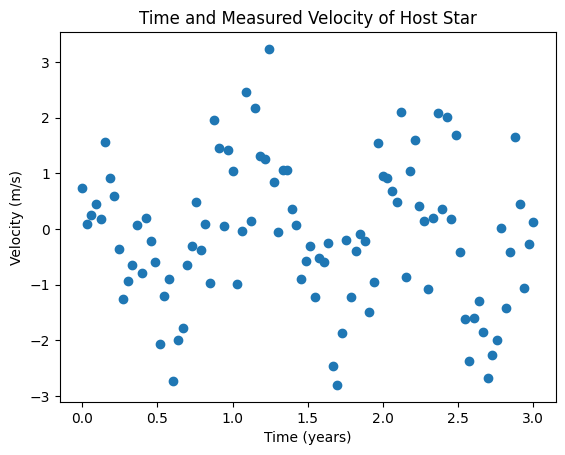

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def measured_velocity(v, t):

    measured_v = (beta0 * math.sin(2 * math.pi * t)) + (beta1 * math.cos(2 * math.pi * t))
    return measured_v

data = pd.read_csv("Problem_Set_2_Exoplanets.csv")
time_list = data["t"]
velocity_list = data["v"]

plt.scatter(time_list, velocity_list)
plt.xlabel("Time (years)")
plt.ylabel("Velocity (m/s)")
plt.title("Time and Measured Velocity of Host Star")